<a href="https://colab.research.google.com/github/Aleksandr62aa/Test_task/blob/main/FC_NN_diabetes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of Diabetes**

**Dataset Diabetes**

**Importing libraries**

In [1]:
!git clone https://github.com/Aleksandr62aa/Test_task.git

Cloning into 'Test_task'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 158 (delta 77), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (158/158), 23.77 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [2]:
%cd Test_task/FC_NN_diabetes

/content/Test_task/FC_NN_diabetes


In [3]:
!pip install -r requirements.txt

100%|██████████| 58/58 [00:01<00:00, 51.30it/s]



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       198
           1       0.69      0.82      0.75       110

    accuracy                           0.81       308
   macro avg       0.79      0.81      0.80       308
weighted avg       0.82      0.81      0.81       308

Layer (type:depth-idx)                   Output Shape              Param #
DiabedNet                                [1, 2]                    --
├─Linear: 1-1                            [1, 64]                   576
├─ReLU: 1-2                              [1, 64]                   --
├─Linear: 1-3                            [1, 32]                   2,080
├─ReLU: 1-4                              [1, 32]                   --
├─Linear: 1-5                            [1, 16]                   528
├─ReLU: 1-6                              [1, 16]                   --
├─Linear: 1-7                            [1, 2]                    34
Total pa

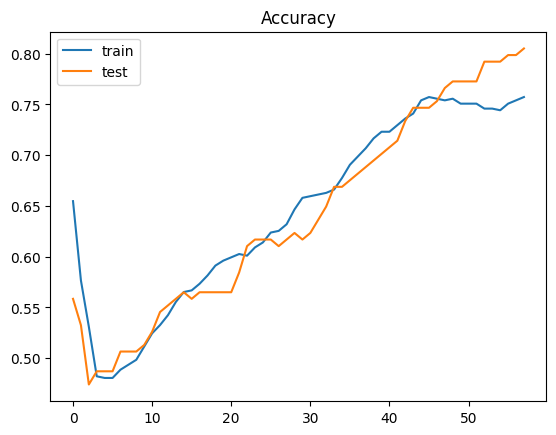

In [8]:
import main
from main import main
main()

In [ ]:
################################################################################

100%|██████████| 58/58 [00:00<00:00, 81.82it/s]



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       198
           1       0.69      0.82      0.75       110

    accuracy                           0.81       308
   macro avg       0.79      0.81      0.80       308
weighted avg       0.82      0.81      0.81       308

Layer (type:depth-idx)                   Output Shape              Param #
DiabedNet                                [1, 2]                    --
├─Linear: 1-1                            [1, 64]                   576
├─ReLU: 1-2                              [1, 64]                   --
├─Linear: 1-3                            [1, 32]                   2,080
├─ReLU: 1-4                              [1, 32]                   --
├─Linear: 1-5                            [1, 16]                   528
├─ReLU: 1-6                              [1, 16]                   --
├─Linear: 1-7                            [1, 2]                    34
Total pa

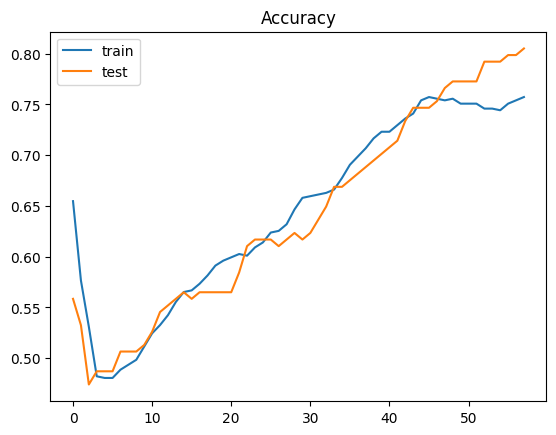

In [19]:
from tqdm import tqdm
import toml
import torch
from torch.utils.data import DataLoader

from nodes.CustomDataset import CustomDataset
from nodes.DiabedNet import DiabedNet
from nodes.TrainingNN import TrainingNN
from utils_local.ClassificationMetrics import ClassificationMetrics
from utils_local.utils import random_seed, plotting, summary_model

def main() -> None:
    config = toml.load("configs/config.toml")
    random_seed()

    # Dataset
    train_dataset = CustomDataset(config, train=True)
    test_dataset = CustomDataset(config, train=False)

    # DataLoader
    train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

    # Model
    model = DiabedNet(config)

    # Loss function
    loss = torch.nn.CrossEntropyLoss(torch.tensor([0.3, 0.7]))
    # Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=config["training"]["learning_rate"])

    # Training procedure
    training_NN = TrainingNN(config, train_dataloader, test_dataloader)
    training_NN.training(model, loss, optimizer)
    train_loss_history, train_accuracy_history, test_loss_history, test_accuracy_history = training_NN.get_history()

    # Results test
    classification_metrics = ClassificationMetrics(test_dataloader)
    classification_metrics.report(model)
    print(f'\nClassification Report:\n {classification_metrics.report(model)}')

    print(summary_model(model, config))

    # plotting(train_loss_history, test_loss_history, "Loss")
    plotting(train_accuracy_history, test_accuracy_history, "Accuracy")

if __name__ == "__main__":
    main()